In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_image = cv2.imread("01079.png")
mask = cv2.imread("01079-lbl.png", 0)

In [3]:
cardIdx = list()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] == 255:
            cardIdx.append([i, j])

card_ids = np.array(cardIdx)

start_r = np.min(card_ids[:, 0])
end_r = np.max(card_ids[:, 0])
start_c = np.min(card_ids[:, 1])
end_c = np.max(card_ids[:, 1])

card_extract = np.rot90(raw_image[start_r:end_r+1, start_c:end_c+1], 1)

cv2.imwrite("card_extract.png", card_extract)

True

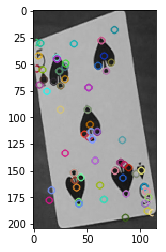

In [9]:
img = cv2.imread('card_extract.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
cv2.drawKeypoints(gray,kp, img)
plt.imshow(img)